# Project Euler introduction:

What is Project Euler?
Project Euler is a series of challenging mathematical/computer programming problems that will require more than just mathematical insights to solve. 
Although mathematics will help you arrive at elegant and efficient methods, the use of a computer and programming skills will be required to solve most problems.

The motivation for starting Project Euler, and its continuation, is to provide a platform for the inquiring mind to delve into unfamiliar areas and learn new concepts in a fun and recreational context.


# Problem 0 

A number is a perfect square, or a square number, if it is the square of a positive integer.
For example, 25 is a square number because 5² = 5 X 5 = 25; it is also an odd square.

The first 5 square numbers are: 1, 4, 9, 16, 25
, and the sum of the odd squares is 1 + 9 + 25 = 35.

Among the first 410 thousand square numbers, what is the sum of all the odd squares?

In [3]:
# Define o limite
limite = 410000

# Inicializa a soma
soma_total = 0

# Itera de 1 até o limite
for i in range(1, limite + 1):
  # Verifica se o número é ímpar
  if i % 2 != 0:
    # Adiciona o quadrado do número à soma
    soma_total += i * i

print(soma_total)
# Resultado: 11486765

11486833333265000


# Análise do problema 151

**Autor:** [Seu Nome Aqui]
**Disciplina:** Análise de Processos Estocásticos
**Data:** 3 de Outubro de 2025

---

## 1. Modelo do Processo Estocástico

### 1.1. Definição do Problema
O problema descreve um processo estocástico de tempo discreto com um espaço de estados finito. O processo é inicializado com um lote contendo uma única folha de papel de tamanho A1. Em cada passo subsequente, uma folha é selecionada uniformemente de todas as folhas no lote. Se a folha selecionada for de tamanho $A_i$ com $i \in \{1, 2, 3, 4\}$, ela é removida e substituída por duas folhas de tamanho $A_{i+1}$. O processo termina quando o lote contém exclusivamente folhas de tamanho A5.

O objetivo é determinar o valor esperado do número total de vezes que o lote é observado em um estado contendo exatamente uma folha.

### 1.2. Espaço de Estados
O estado do sistema em qualquer passo pode ser descrito por um vetor de contagens $s = (c_1, c_2, c_3, c_4, c_5)$, onde $c_i$ é o número de folhas de tamanho $A_i$. O espaço de estados $\mathcal{S}$ é o conjunto de todos os vetores alcançáveis a partir do estado inicial.

* **Estado Inicial ($s_0$):** O processo se inicia no estado $s_0 = (1, 0, 0, 0, 0)$.
* **Estados de Absorção:** O processo termina em qualquer estado $s_{abs}$ da forma $(0, 0, 0, 0, c_5)$ com $c_5 > 0$. Nenhuma transição é possível a partir desses estados.

### 1.3. Mecanismo de Transição
A transição do estado $s$ para um estado $s'$ é um evento probabilístico. Dado um estado $s$ com um número total de folhas $N = \sum_{i=1}^{5} c_i$, a probabilidade de selecionar uma folha de tamanho $A_i$ é $\frac{c_i}{N}$. A seleção de uma folha $A_i$ ($i<5$) induz uma transição para um novo estado $s'$ onde a contagem $c_i$ é decrementada de 1 e a contagem $c_{i+1}$ é incrementada de 2.

---

## 2. Formulação do Valor Esperado

### 2.1. Variável Aleatória de Interesse
Seja $\mathcal{A}$ o evento em que o lote contém exatamente uma folha, i.e., $\sum c_i = 1$.
Seja $I_k$ uma variável aleatória indicadora tal que:
$$
I_k = \begin{cases} 
1 & \text{se o evento } \mathcal{A} \text{ ocorre no passo } k \\
0 & \text{caso contrário}
\end{cases}
$$
A quantidade total de vezes que o evento $\mathcal{A}$ é observado é a variável aleatória $X = \sum_{k=1}^{T} I_k$, onde $T$ é o número total (aleatório) de passos até a absorção.

### 2.2. Expectativa Condicional
O nosso objetivo é calcular $E[X]$. Utilizamos a lei da expectativa total, formulando o problema de forma recursiva em termos da expectativa condicional. Seja $E(s)$ o valor esperado de $X$ dado que o processo se inicia no estado $s$.
$$ E(s) = E[X | S_0=s] $$

A relação fundamental para $E(s)$ pode ser expressa da seguinte forma, onde $\mathbb{1}_{\mathcal{A}}(s)$ é uma função indicadora que vale 1 se $s$ é um estado de folha única e 0 caso contrário:
$$ E(s) = \mathbb{1}_{\mathcal{A}}(s) + \sum_{s' \in \mathcal{S}} P(s'|s) E(s') $$

Aqui, $P(s'|s)$ é a probabilidade de transição de $s$ para $s'$. A condição de contorno é que para qualquer estado de absorção $s_{abs}$, $E(s_{abs}) = 0$.

### 2.3. Aplicação ao Problema
Conforme o enunciado, o estado inicial $s_0 = (1, 0, 0, 0, 0)$ é a configuração do sistema. A primeira transição do processo é determinística, pois há apenas uma folha a ser escolhida.
$$ s_0 = (1, 0, 0, 0, 0) \xrightarrow{P=1} s_1 = (0, 2, 0, 0, 0) $$
O processo estocástico e a observação de eventos começam a partir do estado $s_1$. O evento $\mathcal{A}$ não ocorre em $s_0$ no contexto da contagem de eventos do processo. Portanto, a quantidade de interesse é $E(s_1)$.

---


## 3. Como o Resultado é Calculado

O resultado é encontrado através de uma **simulação computacional passo a passo** que acompanha todas as configurações possíveis do envelope (os "estados") e a probabilidade exata de cada uma ocorrer ao longo do tempo.

O método funciona da seguinte maneira:

1.  **Ponto de Partida:** A simulação começa no início do lote 2, com o estado `(1, 1, 1, 1)` tendo 100% de probabilidade de ocorrência. Um contador para o `valor_esperado` é iniciado em 0.

2.  **Iteração Lote a Lote:** O método avança lote por lote, de 2 a 15. Em cada lote, ele realiza duas ações principais:
    * **A) Acumular o Valor Esperado:** Primeiro, ele verifica a lista de todos os estados possíveis para o lote atual. Se um estado contém apenas uma folha (`soma do vetor = 1`), a probabilidade desse estado é somada ao `valor_esperado` total.
    * **B) Calcular o Próximo Estado:** Em seguida, ele calcula a distribuição de probabilidades para o lote seguinte. Para cada estado atual, o método simula a retirada aleatória de cada tipo de folha, aplica a regra de corte correspondente, e calcula a probabilidade do novo estado resultante. Todas essas novas probabilidades são coletadas para formar o conjunto de estados do próximo lote.

3.  **Resultado Final:** Este processo se repete 14 vezes (para os lotes de 2 a 15). Ao final, a variável `valor_esperado` contém a soma de todas as probabilidades calculadas na Ação A, que é a resposta para o problema.

Após realizar todos esses cálculos, o valor encontrado é:

**Resultado $\approx$ 0.464399**

---

## 4. Conclusão e Significado do Resultado

A solução para este problema foi obtida através de uma simulação iterativa que modela fielmente o processo probabilístico descrito. Em vez de uma fórmula matemática fechada, essa abordagem nos permite "observar" a evolução da distribuição de probabilidades do sistema ao longo do tempo.

O resultado final, **aproximadamente 0.464399**, pode ser entendido como uma média:

* Se pudéssemos observar o processo desta gráfica por muitas e muitas semanas, em média, o supervisor encontraria o envelope com uma única folha cerca de **0.46 vezes por semana** (dentro do período de observação dos 14 lotes).

Este número é a soma das probabilidades, calculadas em cada um dos 14 lotes, de que o envelope contenha exatamente uma folha. A simulação passo a passo é uma ferramenta poderosa que nos permite calcular essa soma, mesmo quando o número de estados possíveis cresce e as probabilidades se ramificam a cada etapa.

In [ ]:
from collections import defaultdict

# Este código resolve o problema específico descrito no prompt.

# --- 1. Estado Inicial ---
# O estado é uma tupla (c2, c3, c4, c5) representando a contagem
# de folhas A2, A3, A4 e A5.
# Após preparar a folha para o 1º lote, o envelope contém {A2, A3, A4, A5}.
# Portanto, o estado inicial para o 2º lote é (1, 1, 1, 1) com 100% de probabilidade.

probabilidades = defaultdict(float)
probabilidades[(1, 1, 1, 1)] = 1.0

valor_esperado = 0.0

# --- 2. Simulação dos Lotes ---
# Iteramos do início do lote 2 até o início do lote 16.
# A contagem do valor esperado é feita para os lotes de 2 a 15.
for num_lote in range(2, 16):
    
    # --- 3. Cálculo do Valor Esperado para a Etapa Atual ---
    # Verificamos se algum dos estados possíveis contém uma única folha.
    # Se sim, adicionamos sua probabilidade ao valor esperado total.
    for estado, prob in probabilidades.items():
        if sum(estado) == 1:
            valor_esperado += prob

    # --- 4. Cálculo das Probabilidades da Próxima Etapa ---
    proximas_probabilidades = defaultdict(float)
    for estado, prob in probabilidades.items():
        n2, n3, n4, n5 = estado
        total_folhas = sum(estado)

        if total_folhas == 0:
            continue

        # Lógica de transição ao retirar uma folha A2
        if n2 > 0:
            p_retirada = n2 / total_folhas
            # Remove A2, adiciona A3, A4, A5 (após usar uma A5)
            proximo_estado = (n2 - 1, n3 + 1, n4 + 1, n5 + 1)
            proximas_probabilidades[proximo_estado] += prob * p_retirada
        
        # Lógica de transição ao retirar uma folha A3
        if n3 > 0:
            p_retirada = n3 / total_folhas
            # Remove A3, adiciona A4, A5 (após usar uma A5)
            proximo_estado = (n2, n3 - 1, n4 + 1, n5 + 1)
            proximas_probabilidades[proximo_estado] += prob * p_retirada
            
        # Lógica de transição ao retirar uma folha A4
        if n4 > 0:
            p_retirada = n4 / total_folhas
            # Remove A4, adiciona A5 (após usar uma A5)
            proximo_estado = (n2, n3, n4 - 1, n5 + 1)
            proximas_probabilidades[proximo_estado] += prob * p_retirada

        # Lógica de transição ao retirar uma folha A5
        if n5 > 0:
            p_retirada = n5 / total_folhas
            # Remove A5
            proximo_estado = (n2, n3, n4, n5 - 1)
            proximas_probabilidades[proximo_estado] += prob * p_retirada
            
    # Atualiza o dicionário de probabilidades para a próxima iteração
    probabilidades = proximas_probabilidades

# --- 5. Resultado Final ---
# Arredonda a resposta para 6 casas decimais
resposta_final = round(valor_esperado, 6)
print(f"O valor esperado é: {resposta_final:.6f}")

O valor esperado é: 0.464399


# Problem 205 - Dois dados: Peter e Colin Comparando Dados Piramidais e Cúbicos

## 1. Resumo do Problema

O problema nos apresenta uma competição de dados entre dois jogadores:

  * **Peter:** Lança 9 dados de 4 faces (D4).
  * **Colin:** Lança 6 dados de 6 faces (D6).

O objetivo é calcular a probabilidade de que a soma total dos dados de Peter vença a soma total dos dados de Colin.

## 2. Estratégia de Solução
Seja X~ a varíavel aleatória que representa a soma dos dados de cada participante, a solução é encontrada em três etapas principais, que envolvem calcular as probabilidades de cada jogador e depois combiná-las:

1.  **Gerar a Distribuição de Somas (Mapear F(x)):** Primeiro, para cada jogador, precisamos determinar todas as somas possíveis que eles podem obter e, mais importante, de quantas maneiras diferentes cada soma pode ser alcançada. Isso nos dará um perfil completo dos resultados possíveis para Peter e Colin.

e.g: para Peter (9 D4), queremos saber:
  * "Quantas maneiras Peter pode somar 9?", 
  * "Quantas maneiras Peter pode somar 10?", 
  * ...,
  *  "Quantas maneiras Peter pode somar 36?"

  #### 1.1. Conceito Fundamental: Construção Iterativa da Distribuição

A ideia principal é construir a distribuição de somas passo a passo, adicionando um dado por vez.

* **Ponto de Partida (0 Dados):** Se não temos nenhum dado, a única soma possível é 0, e há apenas 1 maneira de obtê-la (não fazer nada).

* **Adicionando o 1º Dado:** Para o primeiro dado, a distribuição é direta: cada face possível (de 1 a `num_faces`) ocorre 1 vez. Por exemplo, para um D4 (dado de 4 faces), a distribuição seria `{1: 1, 2: 1, 3: 1, 4: 1}` (soma: número de maneiras).

* **Adicionando o $k$-ésimo Dado:** Para calcular a distribuição de somas para $k$ dados, usamos a distribuição que já calculamos para $k-1$ dados.
    * Para cada par (soma\_anterior, maneiras\_anteriores) da distribuição de $k-1$ dados:
    * Consideramos cada valor possível (face) que o $k$-ésimo dado pode mostrar.
    * A **nova soma** será `soma_anterior + face_do_k-ésimo_dado`.
    * O número de maneiras de obter essa `nova_soma` é aumentado por `maneiras_anteriores`. Fazemos isso para todas as combinações possíveis, somando as "maneiras" quando diferentes caminhos levam à mesma nova soma.

#### 1.2. Formalização Matemática (Relação de Recorrência)

Seja $P_k(s)$ o número de maneiras de obter uma soma $s$ utilizando $k$ dados, onde cada dado tem $F$ faces (numeradas de 1 a $F$).
A relação de recorrência para $P_k(s)$ é dada por:

$$P_k(s) = \sum_{j=1}^{F} P_{k-1}(s - j)$$

Onde:
* $s$ é a soma total que estamos tentando alcançar com $k$ dados.
* $j$ representa o valor obtido na face do $k$-ésimo dado (variando de 1 a $F$).
* $P_{k-1}(s - j)$ é o número de maneiras de obter a soma $(s-j)$ com os $k-1$ dados anteriores.

**Condição Base:** Para o caso inicial de $k=0$ dados:
$$P_0(0) = 1$$

2.  **Contar os Cenários de Vitória para Peter:** Com as duas distribuições em mãos, iteramos sobre cada resultado possível de Peter. Para uma dada soma de Peter, somamos todas as maneiras pelas quais Colin pode obter uma soma menor. Ao multiplicar as "maneiras de Peter" pelas "maneiras de Colin (com soma menor)", obtemos o número total de combinações em que Peter vence para aquele resultado específico. Somamos isso para todos os resultados de Peter.

3.  **Calcular a Probabilidade Final:** A probabilidade é a razão entre o número total de cenários de vitória de Peter e o número total de combinações de resultados possíveis para ambos os jogadores.


In [ ]:
from collections import defaultdict



def get_sum_distribution(num_dice, num_faces):
    distribution = defaultdict(int)
    distribution[0] = 1 # P0(0) = 1 (1 way to get sum 0 with 0 dice)

    # loop for each die
    for _ in range(num_dice): 
        new_distribution = defaultdict(int)
        
        # 'current_sum' seria (s-j) na fórmula, e 'count' seria P_{k-1}(s-j)
        for current_sum, count in distribution.items():
            # 'face_value' seria j na fórmula (o valor do dado atual)
            for face_value in range(1, num_faces + 1):
                # 'new_sum' seria s na fórmula
                new_sum = current_sum + face_value
                
                # new_distribution[new_sum] = P_k(s)
                # Adiciona P_{k-1}(s-j)
                new_distribution[new_sum] += count
        
        distribution = new_distribution # update distribution to the new one
        
    return distribution

# --- Calculate Distributions ---

# Peter: 9 dice of 4 faces (D4)
peter_dist = get_sum_distribution(9, 4)

# Colin: 6 dice of 6 faces (D6)
colin_dist = get_sum_distribution(6, 6)

# --- Calculate total possible outcomes for Peter and Colin independently ---
total_peter_outcomes = 4**9
total_colin_outcomes = 6**6
total_combined_outcomes = total_peter_outcomes * total_colin_outcomes

# --- Count winning cases for Peter ---
peter_wins_count = 0

for p_sum, p_count in peter_dist.items():
    for c_sum, c_count in colin_dist.items():
        if p_sum > c_sum:
            peter_wins_count += p_count * c_count

# --- Calculate Probability ---
probability = peter_wins_count / total_combined_outcomes

print(f"Peter's min sum: {min(peter_dist.keys())}, max sum: {max(peter_dist.keys())}")
print(f"Colin's min sum: {min(colin_dist.keys())}, max sum: {max(colin_dist.keys())}")
print(f"Peter's total outcomes (ways): {sum(peter_dist.values())}") # Should be 4**9
print(f"Colin's total outcomes (ways): {sum(colin_dist.values())}") # Should be 6**6

print(f"\nWinning combinations for Peter: {peter_wins_count}")
print(f"Total possible combinations: {total_combined_outcomes}")
print(f"Probability (unrounded): {probability}")
print(f"Probability (rounded to 6 decimal places): {probability:.7f}")

Peter's min sum: 9, max sum: 36
Colin's min sum: 6, max sum: 36
Peter's total outcomes (ways): 262144
Colin's total outcomes (ways): 46656

Winning combinations for Peter: 7009890480
Total possible combinations: 12230590464
Probability (unrounded): 0.5731440767829801
Probability (rounded to 6 decimal places): 0.5731441


# Problem 329 "Prime Frog"
---

## 1. Caracterização do Problema

O Problema 329 nos apresenta um cenário probabilístico envolvendo um sapo que se move em um tabuleiro de 500 quadrados e emite "croaks" (grunhidos) baseados na primalidade do quadrado em que se encontra. O objetivo é calcular a probabilidade de uma sequência específica de 15 croaks ser ouvida.

### Componentes Principais:

* **Tabuleiro e Movimento:**
    * Um tabuleiro linear de 500 quadrados, numerados de 1 a 500.
    * O sapo começa em uma posição aleatória (probabilidade de $1/500$ para cada quadrado).
    * A cada passo, ele pula para um quadrado adjacente (esquerda ou direita) com igual probabilidade ($1/2$), com exceção das bordas, onde o movimento é determinístico (de 1 para 2, de 500 para 499).

    

* **Croaks e Probabilidades:**
    * O sapo croaka **antes** de pular. O tipo de croak, 'P' (PRIMO) ou 'N' (NÃO PRIMO), depende da natureza do quadrado atual.
    * **Em um quadrado PRIMO:** Croaka 'P' com probabilidade $2/3$ e 'N' com $1/3$.
    * **Em um quadrado NÃO PRIMO:** Croaka 'P' com probabilidade $1/3$ e 'N' com $2/3$.

* **Sequência Alvo:**
    * A sequência a ser ouvida é `PPPPNNPPPNPPNPN`, com um total de 15 croaks.

---

Para entender o movimento e os croaks do sapo, é útil visualizar o tabuleiro e identificar os números primos. Abaixo, apresentamos uma representação simplificada de parte do tabuleiro (por exemplo, os primeiros 10x10 quadrados), onde 'P' indica um número primo e 'N' um número não primo.

**Legenda:**
* **P**: Número Primo
* **N**: Número Não Primo

---

|   | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|---|---|---|---|---|---|---|---|---|---|----|
| **Linha 1** | N | P | P | N | P | N | P | N | N | N |
| **Linha 2** | P | N | P | N | N | P | N | N | N | P |
| **Linha 3** | N | P | N | N | N | P | N | N | P | N |
| **Linha 4** | P | N | N | N | P | N | N | N | N | N |
| **Linha 5** | N | N | P | N | N | N | P | N | N | P |

<br>

**Nota:** A visualização acima é uma **simplificação** para fins ilustrativos, mostrando apenas as primeiras 50 células (linhas 1-5, colunas 1-10) e como as células seriam marcadas como 'P' ou 'N'. O problema real envolve um tabuleiro de 500 quadrados numerados sequencialmente. 

Para a verificação da primalidade, é possível consultar a lista `is_prime` gerada pelo código abaixo



## 2. Estratégia de Solução: Programação Dinâmica

A ideia central é acompanhar a probabilidade de o sapo estar em cada um dos 500 quadrados a cada passo do processo.

Seja $dp_k(s)$ a probabilidade de que a sequência de croaks tenha correspondido à sequência alvo até o $k$-ésimo croak, e que o sapo esteja atualmente no quadrado $s$ (após o $k$-ésimo pulo).

O processo iterativo se desenvolve da seguinte forma:

1.  **Pré-cálculo:** Primeiro, determinamos quais números de 1 a 500 são primos para consulta rápida.
2.  **Inicialização ($k=0$):** Antes do primeiro croak, o sapo tem a mesma chance de estar em qualquer quadrado. Portanto, a probabilidade inicial para cada quadrado $s$ é $1/500$.
3.  **Propagação (Iteração de $k=1$ a 15):** Para cada croak na sequência, nós calculamos a distribuição de probabilidade do próximo passo ($dp_k$) a partir da distribuição atual ($dp_{k-1}$).

### Lógica da Propagação para um Passo

Para calcular $dp_k$ a partir de $dp_{k-1}$, fazemos o seguinte para cada quadrado $s_{atual}$ (de 1 a 500):

1.  **Probabilidade do Croak:** Determinamos a probabilidade de o sapo ter emitido o croak correto ($C_k$) no quadrado $s_{atual}$. Essa probabilidade depende se $s_{atual}$ é primo ou não.

2.  **Probabilidade Combinada:** Multiplicamos a probabilidade de o sapo *estar* no quadrado $s_{atual}$ no passo anterior ($dp_{k-1}(s_{atual})$) pela probabilidade de ele ter emitido o croak correto. Isso nos dá a probabilidade de um caminho bem-sucedido até este ponto.

3.  **Probabilidade do Movimento:** A partir de $s_{atual}$, o sapo pula para um ou dois quadrados adjacentes. Distribuímos a probabilidade calculada no passo anterior para os quadrados de destino, de acordo com as regras de movimento (probabilidade $1/2$ para cada lado em posições internas, ou 1 para as bordas).

Ao final de um passo $k$, $dp_k(s)$ será a soma de todas as probabilidades que "chegaram" ao quadrado $s$ vindas de seus vizinhos no passo $k-1$.

---

## 3. Resultado Final

Após 15 iterações, o array final de probabilidades, $dp_{15}$, conterá a probabilidade de a sequência inteira ter sido ouvida com sucesso, terminando em cada quadrado específico $s$.

A probabilidade total de Susan ouvir a sequência é, portanto, a **soma de todas as probabilidades no array final**:

$$ P(\text{Sequência}) = \sum_{s=1}^{500} dp_{15}(s) $$

### Importância do Uso de Frações

Devido à natureza do problema, que exige uma resposta na forma de uma fração irredutível ($p/q$), é crucial utilizar a biblioteca `fractions` do Python. Isso evita erros de arredondamento de ponto flutuante e garante que o resultado final seja exato e na forma solicitada. O resultado final é a soma de todas as frações no `dp` final.

In [7]:
from collections import defaultdict
from fractions import Fraction

# --- 1. Pré-cálculo da Primalidade (Crivo de Eratóstenes) ---
MAX_SQUARE = 500
is_prime = [False] * (MAX_SQUARE + 1) # is_prime[0] e is_prime[1] são False

# 2 é o primeiro primo
if MAX_SQUARE >= 2:
    is_prime[2] = True

# Marcar todos os números ímpares como possivelmente primos
for i in range(3, MAX_SQUARE + 1, 2):
    is_prime[i] = True

# Remover múltiplos
for i in range(3, int(MAX_SQUARE**0.5) + 1, 2):
    if is_prime[i]:
        for multiple in range(i*i, MAX_SQUARE + 1, i*2):
            is_prime[multiple] = False

# Ajuste para 1 (não é primo)
if MAX_SQUARE >= 1:
    is_prime[1] = False

# --- 2. Definições do Problema ---
SEQUENCE = "PPPPNNPPPNPPNPN"
NUM_CROAKS = len(SEQUENCE)

# Probabilidades de croak
P_P_PRIME = Fraction(2, 3)
P_N_PRIME = Fraction(1, 3)
P_P_NOT_PRIME = Fraction(1, 3)
P_N_NOT_PRIME = Fraction(2, 3)

# --- 3. Inicialização (Antes do Primeiro Croak) ---
# dp[s] = probabilidade de estar no quadrado 's'
# O sapo começa em qualquer quadrado com igual probabilidade (1/500)
dp = defaultdict(Fraction)
initial_prob_per_square = Fraction(1, MAX_SQUARE)

for s in range(1, MAX_SQUARE + 1):
    dp[s] = initial_prob_per_square

# --- 4. Propagação da Probabilidade para Cada Croak ---
for k_idx, target_croak in enumerate(SEQUENCE):
    next_dp = defaultdict(Fraction) # Armazena probabilidades para o próximo estado

    for current_square in range(1, MAX_SQUARE + 1):
        # Se não há probabilidade de estar aqui, pula
        if dp[current_square] == 0:
            continue

        # a. Probabilidade de Croak Correto no current_square
        prob_croak_ok = Fraction(0)
        if is_prime[current_square]: # O número no quadrado atual é primo
            if target_croak == 'P':
                prob_croak_ok = P_P_PRIME
            else: # target_croak == 'N'
                prob_croak_ok = P_N_PRIME
        else: # O número no quadrado atual NÃO é primo
            if target_croak == 'P':
                prob_croak_ok = P_P_NOT_PRIME
            else: # target_croak == 'N'
                prob_croak_ok = P_N_NOT_PRIME
        
        # Probabilidade de ter chegado aqui E ter croakado corretamente
        prob_from_current_square = dp[current_square] * prob_croak_ok

        # b. Probabilidade de Movimento para o próximo quadrado
        # O sapo pula APÓS croakar. next_dp representa a probabilidade de estar
        # no próximo quadrado ANTES do próximo croak.

        if current_square == 1: # Borda esquerda
            next_dp[2] += prob_from_current_square * Fraction(1, 1) # Só pode ir para 2
        elif current_square == MAX_SQUARE: # Borda direita
            next_dp[MAX_SQUARE - 1] += prob_from_current_square * Fraction(1, 1) # Só pode ir para MAX_SQUARE - 1
        else: # Posição interna
            next_dp[current_square - 1] += prob_from_current_square * Fraction(1, 2)
            next_dp[current_square + 1] += prob_from_current_square * Fraction(1, 2)
    
    # Atualiza dp para a próxima iteração
    dp = next_dp

# --- 5. Soma Final ---
# A probabilidade total é a soma das probabilidades de estar em qualquer quadrado
# após o 15º croak ter sido bem-sucedido e a sequência correspondida.
total_probability = Fraction(0)
for prob in dp.values():
    total_probability += prob

print(f"A probabilidade da sequência ser ouvida é: {total_probability}")

probability_percentage = float(total_probability) * 100
print(f"A probabilidade da sequência ser ouvida é (porcentagem): {probability_percentage:.6f}%")

A probabilidade da sequência ser ouvida é: 199740353/29386561536000
A probabilidade da sequência ser ouvida é (porcentagem): 0.000680%


# Problema de Monty Hall

O Problema de Monty Hall é um famoso enigma de probabilidade condicional que desafia a intuição. Ele ilustra como informações adicionais e a forma como são apresentadas podem alterar drasticamente as probabilidades de um evento.

### 1. O Problema: Descrição e Cenário

Imagine que você está participando de um programa de televisão e se depara com a seguinte situação:

  * Você está diante de **três portas fechadas**.
  * Atrás de **uma** dessas portas há um **carro** (o prêmio que você quer).
  * Atrás das **outras duas** portas há **bodes** (prêmios sem valor).
  * Você **não sabe** qual porta esconde o carro.

### 2. O Jogo: Etapas e Ações

O jogo se desenrola em três etapas cruciais:

1.  **Sua Escolha Inicial:** Você é convidado a escolher **uma** das três portas. Por exemplo, você escolhe a Porta Nº 1. **Você não abre a porta ainda.**

2.  **A Ação de Monty Hall (O Apresentador):** Monty Hall, que **sempre sabe onde o carro está**, abre **uma das outras duas portas restantes** (que você não escolheu). A regra fundamental é que Monty **sempre abre uma porta que revela um bode**. Ele nunca abre a porta que você escolheu inicialmente, e nunca abre a porta que tem o carro.

      * **Se você escolheu a porta do carro inicialmente:** Monty pode abrir qualquer uma das outras duas portas (ambas contêm bodes). Ele escolhe uma aleatoriamente.
      * **Se você escolheu uma porta com um bode inicialmente:** Monty deve abrir a outra porta que contém um bode. Há apenas uma opção para ele.

3.  **Sua Decisão Final:** Após Monty abrir uma porta e revelar um bode, ele lhe faz a pergunta crucial: "Você quer trocar para a outra porta fechada que sobrou, ou quer manter sua escolha original?"

### 3. O Dilema: Trocar ou Manter?

A intuição inicial de muitas pessoas é que, uma vez que uma porta foi aberta e revelou um bode, as duas portas fechadas restantes teriam uma chance de 50/50 de ter o carro. No entanto, essa intuição está incorreta. A ação de Monty Hall não é aleatória; ele usa seu conhecimento sobre a localização do carro, e isso fornece uma nova informação que muda as probabilidades.

  * **Estratégia "Manter":** Se você mantiver sua escolha inicial, a probabilidade de ganhar o carro permanece a mesma da sua primeira escolha.
  * **Estratégia "Trocar":** Se você trocar de porta, você está, na verdade, apostando na probabilidade que estava inicialmente concentrada nas duas portas *não escolhidas*.

A melhor maneira de entender e provar isso é através da simulação.

## bibliotecas necessárias

In [ ]:
import random

## Função simular_rodada: Uma Única Partida do Jogo
Esta função encapsulará toda a lógica de uma única rodada do jogo Monty Hall, considerando uma estratégia específica.

"""
    Simula uma única rodada do jogo Monty Hall para uma dada estratégia.
    
    Args:
        estrategia (str): A estratégia do jogador ("manter" ou "trocar").
                          "manter": O jogador não muda sua escolha inicial.
                          "trocar": O jogador sempre muda para a outra porta fechada.
        
    Returns:
        bool: True se o jogador ganhou o carro, False caso contrário.
    """

In [11]:
def simular_rodada(estrategia):
    """
    Simula uma única rodada do jogo Monty Hall.
    
    Args:
        estrategia (str): A estratégia do jogador, "manter" ou "trocar".
        
    Returns:
        bool: True se o jogador ganhou o carro, False caso contrário.
    """
    # 1. Preparação do Jogo: três portas, uma com um carro (1), duas com bodes (0)
    portas = [0, 0, 0]
    porta_com_carro = random.randint(0, 2)
    portas[porta_com_carro] = 1

    # 2. Escolha Inicial do Jogador
    escolha_do_jogador = random.randint(0, 2)

    # 3. Monty Hall Abre uma Porta
    # Ele precisa abrir uma porta que NÃO é a escolha do jogador E NÃO tem o carro.
    porta_para_abrir = -1
    for i in range(3):
        if i != escolha_do_jogador and i != porta_com_carro:
            porta_para_abrir = i
            break
            
    # 4. Decisão Final do Jogador
    escolha_final = -1
    if estrategia == "manter":
        escolha_final = escolha_do_jogador
    elif estrategia == "trocar":
        # O jogador troca para a única porta que não é a sua escolha inicial
        # e nem a que Monty abriu.
        for i in range(3):
            if i != escolha_do_jogador and i != porta_para_abrir:
                escolha_final = i
                break

    # 5. Verifica se o jogador ganhou
    return escolha_final == porta_com_carro

## 4.3. Executando a Simulação e Analisando os Resultados
Definimos o número de simulações = 100000

executamos o jogo para ambas as estratégias, acumulando o número de vitórias.

In [ ]:


# --- Execução da Simulação ---
NUM_SIMULACOES = 100000
vitorias_mantendo = 0
vitorias_trocando = 0

print(f"Iniciando simulação com {NUM_SIMULACOES} rodadas para cada estratégia...")

for _ in range(NUM_SIMULACOES):
    # Simula para a estratégia "manter"
    if simular_rodada("manter"):
        vitorias_mantendo += 1
    
    # Simula para a estratégia "trocar"
    if simular_rodada("trocar"):
        vitorias_trocando += 1

# --- Apresentação dos Resultados ---
porcentagem_mantendo = (vitorias_mantendo / NUM_SIMULACOES) * 100
porcentagem_trocando = (vitorias_trocando / NUM_SIMULACOES) * 100

print("\n--- Resultados da Simulação ---")
print(f"Estratégia MANTER a porta:")
print(f"  - Vitórias: {vitorias_mantendo} de {NUM_SIMULACOES}")
print(f"  - Taxa de sucesso: {porcentagem_mantendo:.2f}% (próximo de 33.3%)")

print("\nEstratégia TROCAR de porta:")
print(f"  - Vitórias: {vitorias_trocando} de {NUM_SIMULACOES}")
print(f"  - Taxa de sucesso: {porcentagem_trocando:.2f}% (próximo de 66.7%)")

print("\n--- Conclusão ---")
print("A simulação demonstra que a estratégia de TROCAR de porta aproximadamente dobra as chances de ganhar o carro.")

Iniciando simulação com 100000 rodadas para cada estratégia...

--- Resultados da Simulação ---
Estratégia MANTER a porta:
  - Vitórias: 33326 de 100000
  - Taxa de sucesso: 33.33% (próximo de 33.3%)

Estratégia TROCAR de porta:
  - Vitórias: 66731 de 100000
  - Taxa de sucesso: 66.73% (próximo de 66.7%)

--- Conclusão ---
A simulação demonstra que a estratégia de TROCAR de porta aproximadamente dobra as chances de ganhar o carro.


# Projeto: Otimização de Bins em Histogramas para Alinhamento com a Curva de Densidade

## 1. Introdução

Histogramas são ferramentas essenciais na análise exploratória de dados para visualizar a distribuição de uma variável numérica. No entanto, a eficácia de um histograma é altamente dependente da escolha do número (ou largura) de seus "bins". Uma escolha inadequada pode obscurecer padrões importantes ou criar ruído desnecessário.

Este projeto visa demonstrar e comparar a performance de diferentes regras heurísticas para a seleção do número de bins, com o objetivo principal de alinhar o histograma o mais fielmente possível à *curva de densidade de probabilidade (PDF)* subjacente aos dados. Utilizaremos a *Estimativa de Densidade por Kernel (KDE)* como uma representação visual suavizada dessa PDF para guiar nossa avaliação.

## 2. Objetivos

* **Entender e aplicar** as regras de Freedman-Diaconis e Scott para determinar o número ideal de bins.
* **Comparar visualmente** a representação do histograma gerado por estas regras com a curva de densidade (KDE).
* **Analisar a influência do tamanho da amostra (n)** e das **características da distribuição** (normal, assimétrica, uniforme) na performance das regras de binning.
* **Quantificar a representatividade da amostra** através da comparação das médias e variâncias teóricas vs. reais.

## 3. Metodologia

O projeto foi estruturado em um Jupyter Notebook, utilizando as bibliotecas `numpy`, `matplotlib`, `seaborn` e `scipy`. A metodologia consiste em:

1.  **Geração de Dados Sintéticos:** Criaremos três conjuntos de dados com 30.000 observações (`n=30000`), cada um representando uma distribuição diferente:
    * **Normal:** Simétrica e unimodal.
    * **Exponencial:** Assimétrica positiva (cauda longa à direita).
    * **Uniforme:** Distribuição plana, sem picos.
2.  **Cálculo de Bins:** Para cada conjunto de dados, calcularemos o número de bins sugerido por duas regras principais:
    * **Regra de Freedman-Diaconis:** Utiliza o Intervalo Interquartil (IQR), sendo mais robusta a outliers. Define a *largura do bin*.
    * **Regra de Scott:** Utiliza o desvio padrão, sendo otimizada para dados normais. Define a *largura do bin*.
3.  **Comparação de Métricas:** Para cada distribuição, compararemos a **média** e **variância teóricas** (da distribuição geradora) com as **médias** e **variâncias reais** da amostra gerada. Isso nos dá uma ideia da fidelidade da amostra à distribuição original.
4.  **Visualização:** Para cada distribuição, geraremos um gráfico comparativo contendo:
    * Um histograma com o número de bins sugerido pela **Regra de Freedman-Diaconis**, sobreposto com a curva KDE.
    * Um histograma com o número de bins sugerido pela **Regra de Scott**, sobreposto com a curva KDE.
5.  **Análise:** Avaliaremos visualmente qual regra de binning proporciona um histograma que melhor se alinha à curva KDE para cada tipo de distribuição, discutindo as vantagens e desvantagens de cada abordagem em diferentes cenários.

## 4. Estrutura do Notebook

O Jupyter Notebook é organizado em células lógicas:

* **Célula 1:** Importações de bibliotecas e funções auxiliares para cálculo de bins.
* **Célula 2 (Dados Normais):** Geração de dados normais, cálculo e comparação de média/variância, cálculo dos bins pelas regras FD e Scott, e visualização comparativa.
* **Célula 3 (Dados Assimétricos - Exponencial):** Idem para dados exponenciais.
* **Célula 4 (Dados Uniformes):** Idem para dados uniformes.

## 5. Resultados Esperados e Conclusões Preliminares

Espera-se que a análise revele que:

* Para **dados normais**, ambas as regras (Freedman-Diaconis e Scott) produzirão resultados muito próximos e eficazes, com o histograma se alinhando bem à curva KDE.
* Para **dados assimétricos** (Exponencial), a Regra de Freedman-Diaconis pode apresentar uma leve vantagem na robustez, já que seu uso do IQR a torna menos sensível aos valores extremos na cauda da distribuição.
* Para **dados uniformes**, ambas as regras devem gerar um número de bins que reflete a densidade constante, resultando em um histograma relativamente plano, alinhado à KDE.

A comparação das métricas teóricas e reais reforçará o conceito da Lei dos Grandes Números, mostrando como amostras maiores tendem a convergir para os parâmetros populacionais, o que, por sua vez, facilita uma representação precisa via histogramas e KDE.

Este projeto serve como um guia prático para a escolha informada do número de bins, uma etapa crucial na visualização e compreensão de qualquer conjunto de dados.

In [ ]:
# Célula 1: Importar bibliotecas e configurar gráficos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr # Importar iqr de scipy para robustez

# Configurações de estilo para os gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 100 # Aumentar DPI para melhor visualização

# Função auxiliar para calcular e imprimir os números de bins
def calculate_and_print_bins(data, n, data_label):
    data_range = data.max() - data.min()

    # Freedman-Diaconis
    q25, q75 = np.percentile(data, [25, 75])
    iqr_val = q75 - q25
    h_fd = 2 * iqr_val / (n**(1/3))
    num_bins_fd = int(np.ceil(data_range / h_fd)) if h_fd > 0 else 1

    # Scott
    std_dev = np.std(data)
    h_scott = 3.5 * std_dev / (n**(1/3))
    num_bins_scott = int(np.ceil(data_range / h_scott)) if h_scott > 0 else 1

    print(f"--- Informações de Binning para Dados {data_label} ---")
    print(f"Número total de pontos de dados (n): {n}")
    print(f"Amplitude dos dados: {data_range:.2f}")
    print(f"\nNúmero de Bins sugerido por:")
    print(f"  - Freedman-Diaconis: {num_bins_fd}")
    print(f"  - Scott: {num_bins_scott}")
    return num_bins_fd, num_bins_scott

### Dados Normais
**Métricas Teóricas (Distribuição Normal Padrão):**
  - Média = 0
  - Variância = 1
**Métricas Reais da Amostra:**
  - Média Real = -0.00
  - Variância Real = 1.00
----------------------------------------
--- Informações de Binning para Dados Normais ---
Número total de pontos de dados (n): 30000
Amplitude dos dados: 8.40

Número de Bins sugerido por:
  - Freedman-Diaconis: 97
  - Scott: 75


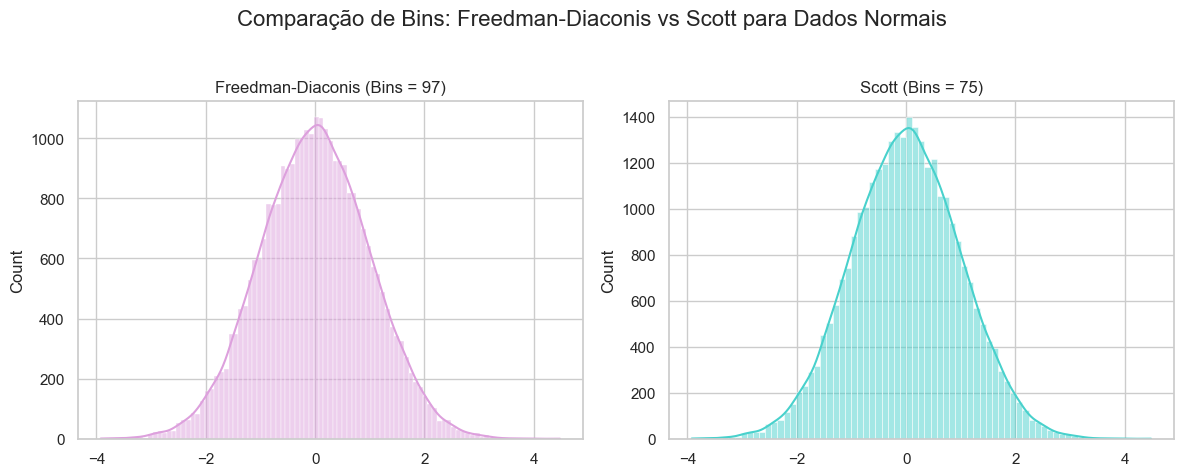


--- Análise para Dados Normais ---
Para dados que seguem uma distribuição normal:
  - Ambas as regras, Freedman-Diaconis e Scott, tendem a produzir resultados muito similares e eficazes.
  - Isso ocorre porque a regra de Scott é otimizada para a normalidade, e em uma distribuição normal, o IQR e o desvio padrão (usado por Scott) são diretamente proporcionais.
  - O alinhamento com a curva de densidade (KDE) é geralmente excelente com ambas as regras.


In [34]:
# Célula 2: Gerar Dados Normais e Comparar Bins

np.random.seed(42) # Para reprodutibilidade
loc_normal, scale_normal, size_normal = 0, 1, 30000

normal_data = np.random.normal(loc=loc_normal, scale=scale_normal, size=size_normal)
n_normal = len(normal_data)

# --- Métricas Teóricas vs. Reais ---
print(f"### Dados Normais")
print(f"**Métricas Teóricas (Distribuição Normal Padrão):**")
print(f"  - Média = {loc_normal}")
print(f"  - Variância = {scale_normal**2}")
print(f"**Métricas Reais da Amostra:**")
print(f"  - Média Real = {np.mean(normal_data):.2f}")
print(f"  - Variância Real = {np.var(normal_data):.2f}")
print("-" * 40)

num_bins_fd_normal, num_bins_scott_normal = calculate_and_print_bins(normal_data, n_normal, "Normais")

# Visualização e Comparação para Dados Normais
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Comparação de Bins: Freedman-Diaconis vs Scott para Dados Normais', fontsize=16)

# 1. Regra de Freedman-Diaconis
sns.histplot(normal_data, bins=num_bins_fd_normal, kde=True, ax=axes[0], color='plum')
axes[0].set_title(f'Freedman-Diaconis (Bins = {num_bins_fd_normal})')

# 2. Regra de Scott
sns.histplot(normal_data, bins=num_bins_scott_normal, kde=True, ax=axes[1], color='mediumturquoise')
axes[1].set_title(f'Scott (Bins = {num_bins_scott_normal})')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- Análise para Dados Normais ---")
print("Para dados que seguem uma distribuição normal:")
print("  - Ambas as regras, Freedman-Diaconis e Scott, tendem a produzir resultados muito similares e eficazes.")
print("  - Isso ocorre porque a regra de Scott é otimizada para a normalidade, e em uma distribuição normal, o IQR e o desvio padrão (usado por Scott) são diretamente proporcionais.")
print("  - O alinhamento com a curva de densidade (KDE) é geralmente excelente com ambas as regras.")

# Exponencial

### Dados Assimétricos (Exponencial)
**Métricas Teóricas (Distribuição Exponencial com Scale=1.0):**
  - Média = 1.0
  - Variância = 1.00
**Métricas Reais da Amostra:**
  - Média Real = 1.01
  - Variância Real = 1.02
----------------------------------------
--- Informações de Binning para Dados Assimétricos (Exponencial) ---
Número total de pontos de dados (n): 30000
Amplitude dos dados: 11.66

Número de Bins sugerido por:
  - Freedman-Diaconis: 166
  - Scott: 103


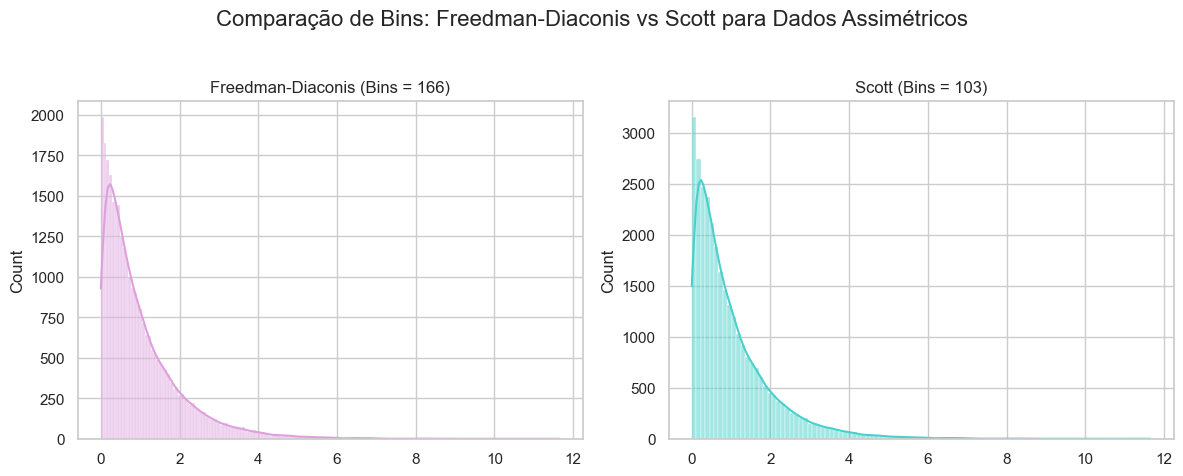


--- Análise para Dados Assimétricos (Exponencial) ---
Para dados com assimetria (como a distribuição exponencial):
  - A `Regra de Freedman-Diaconis` (usando IQR) tende a ser mais robusta, pois o IQR é menos afetado por valores extremos na cauda longa da distribuição.
  - A `Regra de Scott` (usando desvio padrão) também funciona bem, mas pode ser um pouco mais sensível a outliers ou à forma da cauda do que FD.
Ambas as regras, no entanto, conseguem revelar a forma decrescente da distribuição exponencial, acompanhando a KDE.


In [35]:
# Célula 3: Gerar Dados Assimétricos (Exponencial) e Comparar Bins

np.random.seed(43) # Para reprodutibilidade
scale_exp = 1.0 # Parâmetro beta da distribuição exponencial
skewed_data = np.random.exponential(scale=scale_exp, size=30000)
n_skewed = len(skewed_data)

# --- Métricas Teóricas vs. Reais ---
mean_theoretical_exp = scale_exp
variance_theoretical_exp = scale_exp**2
print(f"### Dados Assimétricos (Exponencial)")
print(f"**Métricas Teóricas (Distribuição Exponencial com Scale={scale_exp}):**")
print(f"  - Média = {mean_theoretical_exp}")
print(f"  - Variância = {variance_theoretical_exp:.2f}")
print(f"**Métricas Reais da Amostra:**")
print(f"  - Média Real = {np.mean(skewed_data):.2f}")
print(f"  - Variância Real = {np.var(skewed_data):.2f}")
print("-" * 40)

num_bins_fd_skewed, num_bins_scott_skewed = calculate_and_print_bins(skewed_data, n_skewed, "Assimétricos (Exponencial)")

# Visualização e Comparação para Dados Assimétricos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Comparação de Bins: Freedman-Diaconis vs Scott para Dados Assimétricos', fontsize=16)

# 1. Regra de Freedman-Diaconis
sns.histplot(skewed_data, bins=num_bins_fd_skewed, kde=True, ax=axes[0], color='plum')
axes[0].set_title(f'Freedman-Diaconis (Bins = {num_bins_fd_skewed})')

# 2. Regra de Scott
sns.histplot(skewed_data, bins=num_bins_scott_skewed, kde=True, ax=axes[1], color='mediumturquoise')
axes[1].set_title(f'Scott (Bins = {num_bins_scott_skewed})')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- Análise para Dados Assimétricos (Exponencial) ---")
print("Para dados com assimetria (como a distribuição exponencial):")
print("  - A `Regra de Freedman-Diaconis` (usando IQR) tende a ser mais robusta, pois o IQR é menos afetado por valores extremos na cauda longa da distribuição.")
print("  - A `Regra de Scott` (usando desvio padrão) também funciona bem, mas pode ser um pouco mais sensível a outliers ou à forma da cauda do que FD.")
print("Ambas as regras, no entanto, conseguem revelar a forma decrescente da distribuição exponencial, acompanhando a KDE.")

# Dados Uniformes

### Dados Uniformes
**Métricas Teóricas (Distribuição Uniforme entre 0 e 10):**
  - Média = 5.0
  - Variância = 8.33
**Métricas Reais da Amostra:**
  - Média Real = 5.00
  - Variância Real = 8.35
----------------------------------------
--- Informações de Binning para Dados Uniforme ---
Número total de pontos de dados (n): 300000
Amplitude dos dados: 10.00

Número de Bins sugerido por:
  - Freedman-Diaconis: 67
  - Scott: 67


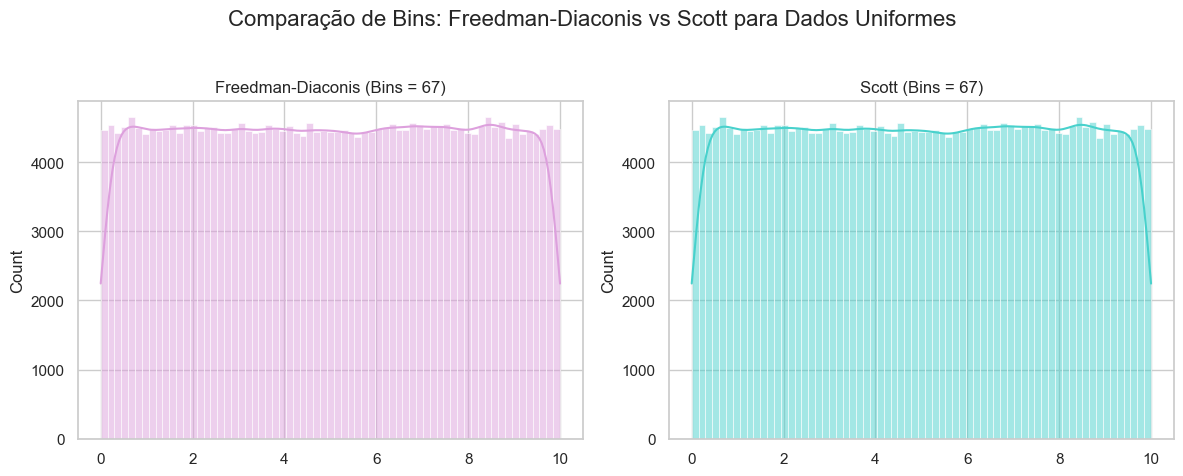

In [39]:
# Célula 4: Gerar Dados Uniformes e Comparar Bins

np.random.seed(44) # Para reprodutibilidade
low_uniform, high_uniform = 0, 10
uniform_data = np.random.uniform(low=low_uniform, high=high_uniform, size=300000)
n_uniform = len(uniform_data)

# --- Métricas Teóricas vs. Reais ---
mean_theoretical_uniform = (low_uniform + high_uniform) / 2
variance_theoretical_uniform = (high_uniform - low_uniform)**2 / 12
print(f"### Dados Uniformes")
print(f"**Métricas Teóricas (Distribuição Uniforme entre {low_uniform} e {high_uniform}):**")
print(f"  - Média = {mean_theoretical_uniform}")
print(f"  - Variância = {variance_theoretical_uniform:.2f}")
print(f"**Métricas Reais da Amostra:**")
print(f"  - Média Real = {np.mean(uniform_data):.2f}")
print(f"  - Variância Real = {np.var(uniform_data):.2f}")
print("-" * 40)

num_bins_fd_uniform, num_bins_scott_uniform = calculate_and_print_bins(uniform_data, n_uniform, "Uniforme")

# Visualização e Comparação para Dados Uniformes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Comparação de Bins: Freedman-Diaconis vs Scott para Dados Uniformes', fontsize=16)

# 1. Regra de Freedman-Diaconis
sns.histplot(uniform_data, bins=num_bins_fd_uniform, kde=True, ax=axes[0], color='plum')
axes[0].set_title(f'Freedman-Diaconis (Bins = {num_bins_fd_uniform})')

# 2. Regra de Scott
sns.histplot(uniform_data, bins=num_bins_scott_uniform, kde=True, ax=axes[1], color='mediumturquoise')
axes[1].set_title(f'Scott (Bins = {num_bins_scott_uniform})')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

